In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sms
import os
import inspect

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 '7U7D.csv',
 'AADIS.csv',
 'Aggregation-checkpoint.ipynb',
 'AllSharedRewardData.csv',
 'AUDIT, DUDIT, AADIS, 7U7D, rescoring and aggregation.ipynb',
 'Helping Ori & Amanda.ipynb',
 'ISTART - RECOVERED DATA - reward sensitivity screeners.csv',
 'ISTART-Reward-Quintiles-Combined.csv',
 'ISTART2021-Demographics_DATA_2021-10-29_1323.csv',
 'ISTART2021-QuestionnaireScoresU_DATA_2021-10-29_1336.csv',
 'ISTART2021-RewardSensitivityQui_DATA_2021-10-29_1337.csv',
 'ISTART2021-RSQ.csv',
 'joinedfile.csv',
 'Making_RS_PCA.ipynb',
 'ReadMe_Behavioral_Analysis.txt',
 'Reward_Sensitivity.csv',
 'Shared Reward Behavioral Analysis.ipynb',
 'Shared Reward Data Aggregation.ipynb',
 'SR_PartnerRatings.csv',
 'SR_PartnerRatings_PS.csv',
 'SR_REDCap_data.csv',
 'Substance_and_Mood_data.csv',
 'Substance_and_Mood_data_SCORED.csv']

In [3]:
fname='Reward_Sensitivity.csv'
PC1 = pd.read_csv(fname)
print(type(PC1))
PC1.head(0)


<class 'pandas.core.frame.DataFrame'>


,RealID,gender,SPSRWD,BISBAS_BAS,PC1


,RealID,gender,SPSRWD,BISBAS_BAS,PC1
RealID,1.000000,0.018243,-0.041490,0.045425,0.011193
gender,0.018243,1.000000,0.207568,-0.008792,0.087095
SPSRWD,-0.041490,0.207568,1.000000,0.632911,0.861885
BISBAS_BAS,0.045425,-0.008792,0.632911,1.000000,0.938109
PC1,0.011193,0.087095,0.861885,0.938109,1.000000


<AxesSubplot:>

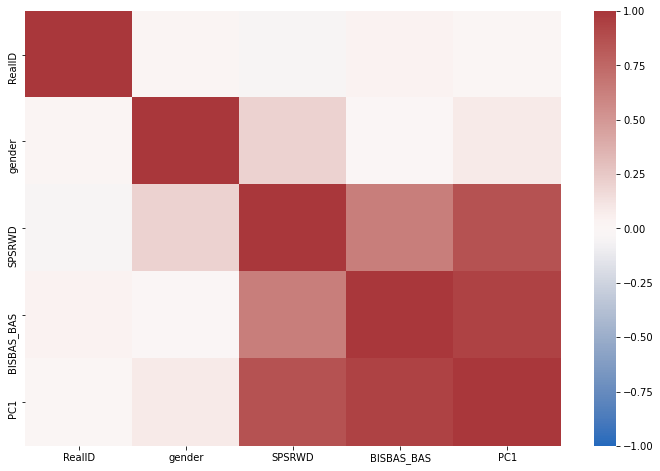

In [4]:
cormat=PC1.corr()
display(cormat)
fig = plt.figure(figsize=(12, 8))
sms.heatmap(cormat,cmap='vlag',vmin=-1)


Correlation between reward sensitivity is 
 R^2: 0.40057571910166434 p: 2.8445206648412372e-11


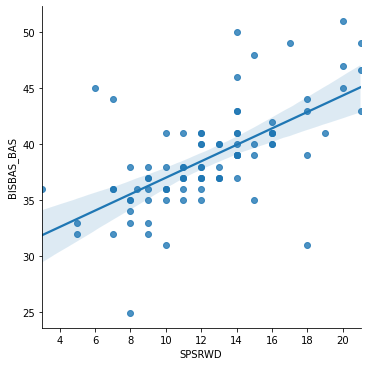

<class 'seaborn.axisgrid.FacetGrid'>


In [5]:
PC1=PC1[['RealID','gender','SPSRWD','BISBAS_BAS']]
r,p=stats.pearsonr(PC1['SPSRWD'],PC1['BISBAS_BAS'])
print("Correlation between reward sensitivity is \n R^2: %s p: %s"%(r**2,p))
g=sms.lmplot(x='SPSRWD',y='BISBAS_BAS',data=PC1)
plt.show()
print(type(g))


In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)

features=['SPSRWD','BISBAS_BAS']
X = df.loc[:, features].values
PC1=pca.fit_transform(X)
print(PC1)

df['PC1']=PC1
display(df['PC1'])
df.to_csv(fname,index='False')

NameError: name 'df' is not defined

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()